In [1]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as p

In [82]:
df=pd.read_csv('scores.csv', comment='#', escapechar='\t')
#for i in df:
#    if i[0]=='\t':
#        i==i[1:]
#        df.rename(columns={i: i[1:]}, inplace=True)
df.rename(columns=lambda x: x.strip('\t ') if isinstance(x, str) else x, inplace=True)
df['city'] = df['city'].str.lstrip()
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.strip('\t')if isinstance(x, str) else x)
    df[col] = df[col].apply(lambda x: x.lstrip() if isinstance(x, str) else x)
df

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
0,1,1,7,2023,Bali United FC,0,1,0,0,PSS Sleman,1,1,3,3,Kapten I Wayan Dipta,Gianyar
1,1,1,7,2023,Persis Solo,2,1,0,0,Persebaya Surabaya,3,1,3,3,Manahan,Solo
2,1,2,7,2023,Persib Bandung,1,1,1,1,Madura United FC,1,1,1,1,Gelora Bandung Lautan Api,Bandung
3,1,2,7,2023,Dewa United FC,1,1,3,3,Arema FC,0,1,0,0,Indomilk Arena,Tangerang
4,1,2,7,2023,PS Barito Putera,2,1,3,3,Persita Tangerang,0,1,0,0,Demang Lehman,Martapura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,9,19,8,2023,Rans Nusantara FC,0,5,1,16,Dewa United FC,0,5,1,12,Maguwoharjo,Sleman
77,9,19,8,2023,PS Barito Putera,2,5,3,17,Persik Kediri,0,5,0,11,Demang Lehman,Martapura
78,9,19,8,2023,Persis Solo,3,5,3,12,Bali United FC,1,4,0,14,Manahan,Solo
79,9,20,8,2023,Persija Jakarta,2,5,1,13,Arema FC,2,5,1,3,Patriot Chandra Bhaga,Bekasi


In [3]:
ket = open('scores.csv', 'r').readlines()
ket[-1]

'#home total = total points (cumulative) earned in total for team in home column'

In [105]:
print(df['city'].values)

['Gianyar' 'Solo' 'Bandung' 'Tangerang' 'Martapura' 'Sleman' 'Kediri'
 'Semarang' 'Jakarta Pusat' 'Sleman' 'Gianyar' 'Surabaya' 'Pare-pare'
 'Tangerang' 'Samarinda' 'Pamekasan' 'Bekasi' 'Bogor' 'Bogor' 'Martapura'
 'Bandung' 'Sleman' 'Kediri' 'Solo' 'Gianyar' 'Semarang' 'Bekasi'
 'Samarinda' 'Sleman' 'Tangerang' 'Gianyar' 'Tangerang' 'Pare-pare'
 'Bekasi' 'Surabaya' 'Pamekasan']


### algorithm cekson

In [63]:
df.loc[df.home.str.contains('Kediri')]

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
6,1,3,7,2023,Persik Kediri,1,1,1,1,Borneo FC Samarinda,1,1,1,1,Brawijaya,Kediri
22,3,15,7,2023,Persik Kediri,5,2,3,4,Arema FC,2,2,0,1,Brawijaya,Kediri


In [65]:
# home or away at certain week
hora = df.loc[
   ( (df.home.str.contains('Bali')) | (df.away.str.contains('Bali')) ) & (df['week']==3)
]

hora

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
24,3,15,7,2023,Bali United FC,2,2,3,3,Madura United FC,1,2,0,4,Kapten I Wayan Dipta,Gianyar


In [66]:
df.loc[df.home.str.contains('Bali') | df.away.str.contains('Bali')]

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
0,1,1,7,2023,Bali United FC,0,1,0,0,PSS Sleman,1,1,3,3,Kapten I Wayan Dipta,Gianyar
14,2,8,7,2023,Borneo FC Samarinda,3,1,3,4,Bali United FC,1,1,0,0,Segiri,Samarinda
24,3,15,7,2023,Bali United FC,2,2,3,3,Madura United FC,1,2,0,4,Kapten I Wayan Dipta,Gianyar


In [67]:
hgf=df.loc[df.home.str.contains('Bali')]['hscore'].sum() #goal for
agf=df.loc[df.away.str.contains('Bali')]['ascore'].sum()
hga=df.loc[df.home.str.contains('Bali')]['ascore'].sum() #goal against
aga=df.loc[df.away.str.contains('Bali')]['hscore'].sum()
win=df[((df['home'] == 'Bali United FC') & (df['hpoint'] == 3)) | ((df['away'] == 'Bali United FC') & (df['apoint'] == 3))].shape[0]
draw=df[((df['home'] == 'Bali United FC') & (df['hpoint'] == 1)) | ((df['away'] == 'Bali United FC') & (df['apoint'] == 1))].shape[0]
lose=df[((df['home'] == 'Bali United FC') & (df['hpoint'] == 0)) | ((df['away'] == 'Bali United FC') & (df['apoint'] == 0))].shape[0]
print(hgf,agf,hga,aga,win,draw,lose)

2 1 2 3 1 0 2


In [228]:
if hora.home.str.contains('Bali').item():
    total_point=hora.htotal
else:
    total_point=hora.atotal
total_point

14    0
Name: atotal, dtype: int64

# klasemen pekan ke

In [3]:
club = df['home'].unique()
club

array(['Bali United FC', 'Persis Solo', 'Persib Bandung',
       'Dewa United FC', 'PS Barito Putera', 'Rans Nusantara FC',
       'Persik Kediri', 'PSIS Semarang', 'Persija Jakarta', 'PSS Sleman',
       'Arema FC', 'Persebaya Surabaya', 'PSM Makassar',
       'Persita Tangerang', 'Borneo FC Samarinda', 'Madura United FC',
       'Bhayangkara FC', 'Persikabo 1973'], dtype=object)

In [83]:
points = []
hgf=[]
agf=[]
hga=[]
aga=[]
win=[]
draw=[]
lose=[]
played=[]
pekanke=9 # PEKAN KE
for cl in club:
    hora = df.loc[ ( (df.home.str.contains(cl)) | (df.away.str.contains(cl)) ) & (df['week']==pekanke) ] # PEKAN KE
    
    hgf.append(df.loc[df.home.str.contains(cl)]['hscore'].sum()) #goal for
    agf.append(df.loc[df.away.str.contains(cl)]['ascore'].sum())
    hga.append(df.loc[df.home.str.contains(cl)]['ascore'].sum()) #goal against
    aga.append(df.loc[df.away.str.contains(cl)]['hscore'].sum())
    
    win.append(df[((df['home'] == cl) & (df['hpoint'] == 3)) | ((df['away'] == cl) & (df['apoint'] == 3))].shape[0])
    draw.append(df[((df['home'] == cl) & (df['hpoint'] == 1)) | ((df['away'] == cl) & (df['apoint'] == 1))].shape[0])
    lose.append(df[((df['home'] == cl) & (df['hpoint'] == 0)) | ((df['away'] == cl) & (df['apoint'] == 0))].shape[0])

    try:
        if hora.home.str.contains(cl).item():
            points.append(hora['htotal'].values[0])          
        else:
            points.append(hora['atotal'].values[0])
        played.append(pekanke)
        #print ('try ',cl,' ',pekanke)
    except:
        hora = df.loc[ ( (df.home.str.contains(cl)) | (df.away.str.contains(cl)) ) & (df['week']==pekanke-1) ]
        if hora.home.str.contains(cl).item():
            points.append(hora['htotal'].values[0])          
        else:
            points.append(hora['atotal'].values[0])
        played.append(pekanke-1)
        #print ('ex ',cl,' ',pekanke-1)
points

[14, 12, 11, 12, 17, 16, 11, 14, 13, 15, 3, 14, 11, 10, 16, 19, 4, 8]

## head to head

In [5]:
df.groupby(["home","away"])

In [84]:
dff=df.groupby(["home","away"]).agg({'hscore':['max'],'ascore':['max'],
                                     'hpoint':['max'],'apoint':['max']})
dff.columns=dff.columns.droplevel(1)
#dff = dff.unstack(fill_value=0)
#dff = pd.merge(dff, df[['home', 'away', 'hscore', 'ascore']], on=['home', 'away'])
dff

hscore  ascore  hpoint  apoint
home              away                                             
Arema FC          Bali United FC          1       3       0       3
                  PS Barito Putera        0       4       0       3
                  Persib Bandung          3       3       1       1
                  Rans Nusantara FC       0       1       0       3
Bali United FC    Dewa United FC          3       1       3       0
...                                     ...     ...     ...     ...
Rans Nusantara FC Dewa United FC          0       0       1       1
                  Madura United FC        3       1       3       0
                  PSS Sleman              0       0       1       1
                  Persikabo 1973          2       1       3       0
                  Persita Tangerang       0       1       0       3

[81 rows x 4 columns]

### cekson refer elemen multi-level datafrem

In [32]:
dff.loc[['Persis Solo']]

hscore  ascore  hpoint  apoint
home        away                                               
Persis Solo Borneo FC Samarinda       2       1       3       0
            Persebaya Surabaya        2       3       0       3

In [56]:
dff.loc[dff.index.get_level_values('home')==('PS Barito Putera')or
        dff.index.get_level_values('home')==('Borneo FC Samarinda')or
        dff.index.get_level_values('home')==('PSIS Semarang')or
        dff.index.get_level_values('home')==('PSM Makassar')or
        dff.index.get_level_values('home')==('Madura United FC')or
        dff.index.get_level_values('home')==('Rans Nusantara FC')]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [29]:
dff.loc[dff.index.get_level_values('away')=='Persis Solo'] #iloc juga bisa

,,hscore,ascore,hpoint,apoint
home,away,,,,
Madura United FC,Persis Solo,4,3,3,0
PSS Sleman,Persis Solo,2,2,1,1


In [42]:
#dff.loc[['Persis Solo']]
#dff.loc[dff.index.get_level_values('away')=='Persis Solo'] #iloc juga bisa
dff.loc[[('PSS Sleman','Persis Solo'),('Persis Solo','Borneo FC Samarinda')]]
dff.loc[ ((h1&a2) | (h2&a1))

,,hscore,ascore,hpoint,apoint
home,away,,,,
PSS Sleman,Persis Solo,2,2,1,1
Persis Solo,Borneo FC Samarinda,2,1,3,0


In [43]:
len(dff.loc[[('PSS Sleman','Persis Solo'),('Persis Solo','Borneo FC Samarinda')]])

2

In [183]:
print(
    dff.loc[('Persis Solo','Borneo FC Samarinda')]['hpoint'],
    dff.loc[('PSS Sleman','Persis Solo')]['hpoint']
)

3 1


### who's upper?

In [185]:
#GIMANA INI?

max(
    (dff.loc[('Persis Solo','Borneo FC Samarinda')]['hpoint']),
    (dff.loc[('PSS Sleman','Persis Solo')]['hpoint'])
)

3

In [18]:
def h2h(club,st):
    eq=df.loc[
        ( (df['home']==club[st]) & (df['away']==club[st+1]) )|
        ( (df['away']==club[st]) & (df['home']==club[st+1]) ),
        ['home','away','hpoint']
    ].reset_index(drop=True)
    
    if len(eq)<=1:
        eq.loc[1]=n.nan
        if len(eq)<=1:
            eq.loc[0]=n.nan
    
    if pd.isnan(eq.home[0]):
        ret=club[st]
    else:
        ret=eq.sort_values(by='hpoint')['home'].reset_index(drop=True)[0]
    
    return(ret)

## klasemen

In [85]:
tables = pd.DataFrame ({"Clubs": club, "Played":played, "Won":win, "Drawn":draw, "Lost":lose, 
                        "GF":[h + a for h, a in zip(hgf, agf)], "GA":[h + a for h, a in zip(hga, aga)], 
                        "Points": points})
#tables["GD"]=tables['GF']-tables['GA']
tables.insert(len(tables.columns)-1, "GD", (tables['GF']-tables['GA']))

# Convert club names to lowercase before sorting bikinan chatgpt tapi solutip
tables["Clubs_lower"] = tables["Clubs"].str.lower()

# Sort the dataframe + indexing
tables=tables.sort_values(by=['Points','GD','GF','Clubs_lower'], ascending=[False,False,False,True]).reset_index(drop=True)
tables.index=tables.index + 1

# Drop the temporary "Clubs_lower" column
tables.drop(columns=["Clubs_lower"], inplace=True)

tables

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points
1,Madura United FC,9,6,1,2,18,12,6,19
2,PS Barito Putera,9,5,2,2,17,8,9,17
3,Borneo FC Samarinda,9,4,4,1,14,9,5,16
4,Rans Nusantara FC,9,4,4,1,11,7,4,16
5,PSS Sleman,9,4,3,2,16,15,1,15
6,PSIS Semarang,9,4,2,3,14,9,5,14
7,Bali United FC,9,4,2,3,14,13,1,14
8,Persebaya Surabaya,9,4,2,3,11,11,0,14
9,Persija Jakarta,9,3,4,2,12,9,3,13
10,Persis Solo,9,3,3,3,15,15,0,12


### coba sort h2h bikinan gua

In [86]:
# another dataframe
pridx=n.array((range(18,0,-1)))
sh = tables[['Clubs','Points']]
sh.insert(2,'pr',pridx)
sh

,Clubs,Points,pr
1,Madura United FC,19,18
2,PS Barito Putera,17,17
3,Borneo FC Samarinda,16,16
4,Rans Nusantara FC,16,15
5,PSS Sleman,15,14
6,PSIS Semarang,14,13
7,Bali United FC,14,12
8,Persebaya Surabaya,14,11
9,Persija Jakarta,13,10
10,Persis Solo,12,9


In [87]:
pridx=n.array((range(18,0,-1)))
sh = tables[['Clubs','Points']]
sh.insert(2,'pr',pridx)
sh

for i in range (1,len(sh)+1,1):#(len(sh)):
    #print (i)
    try:
        sh['Points'][i]==sh['Points'][i+1]
        #print(sh['Clubs'][i], sh['Clubs'][i+1])
        
        if sh['Points'][i]==sh['Points'][i+1]:
            
            h1=dff.index.get_level_values('home')==sh['Clubs'][i]
            a2=dff.index.get_level_values('away')==sh['Clubs'][i+1]
            h2=dff.index.get_level_values('home')==sh['Clubs'][i+1]
            a1=dff.index.get_level_values('away')==sh['Clubs'][i]
            
            i1scr=0
            i2scr=0
        
            game = dff.loc[ ((h1&a2) | (h2&a1)) ]
            #print('game masuk try lv 1')
            
            if len(game)==1:
                #print('game 1')
                
                try:
                    i1scr = dff.loc[(sh['Clubs'][i],sh['Clubs'][i+1])]['hpoint']
                    i2scr = dff.loc[(sh['Clubs'][i],sh['Clubs'][i+1])]['apoint']
                    #print('try lv 2')
                except:
                    i1scr = dff.loc[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]['apoint'] 
                    i2scr = dff.loc[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]['hpoint']
                    #print('exc lv 2')
                
                #if i1scr < i2scr: EMANG KOMEN
                    #sh['pr'][i]=sh['pr'][i]-1 EMANG KOMEN
                    #sh['pr'][i+1]=sh['pr'][i+1]+1 EMANG KOMEN
            
            elif len(game)==2:
                i1scr = dff.loc[[ (sh['Clubs'][i],sh['Clubs'][i+1]) ]]['hpoint'] + dff.loc[[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]]['apoint']
                i2scr = dff.loc[[ (sh['Clubs'][i],sh['Clubs'][i+1]) ]]['apoint'] + dff.loc[[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]]['hpoint']
                #print('game = 2')
                
            if i1scr < i2scr:
                #print('i1scr < i2scr')
                sh.at[i,'pr']=sh['pr'][i]-1
                sh.at[i+1,'pr']=sh['pr'][i+1]+1
        
    except:
        #print('gabisa')
        pass
sh

,Clubs,Points,pr
1,Madura United FC,19,18
2,PS Barito Putera,17,17
3,Borneo FC Samarinda,16,16
4,Rans Nusantara FC,16,15
5,PSS Sleman,15,14
6,PSIS Semarang,14,13
7,Bali United FC,14,12
8,Persebaya Surabaya,14,11
9,Persija Jakarta,13,10
10,Persis Solo,12,9


In [88]:
sh=sh.sort_values(by='pr', ascending=False).reset_index(drop=True)
sh

,Clubs,Points,pr
0,Madura United FC,19,18
1,PS Barito Putera,17,17
2,Borneo FC Samarinda,16,16
3,Rans Nusantara FC,16,15
4,PSS Sleman,15,14
5,PSIS Semarang,14,13
6,Bali United FC,14,12
7,Persebaya Surabaya,14,11
8,Persija Jakarta,13,10
9,Persis Solo,12,9


### bikinan chat gpt gblk

In [11]:
tablesai=pd.DataFrame ({"Clubs": club, "Won":win, "Drawn":draw, "Lost":lose, 
                        "GF":[h + a for h, a in zip(hgf, agf)], "GA":[h + a for h, a in zip(hga, aga)], 
                        "Points": points})
tablesai.insert(len(tablesai.columns)-1, "GD", (tablesai['GF']-tablesai['GA']))

tablesai=tablesai.sort_values(by=['Points'], ascending=False).reset_index(drop=True)
tablesai.index=tablesai.index + 1
tablesai

,Clubs,Won,Drawn,Lost,GF,GA,GD,Points
1,Dewa United FC,3,1,0,8,3,5,7
2,PS Barito Putera,2,1,1,7,4,3,7
3,Persita Tangerang,2,0,1,3,2,1,6
4,Rans Nusantara FC,2,0,1,4,3,1,6
5,PSIS Semarang,2,1,1,7,5,2,6
6,Persija Jakarta,1,2,0,5,2,3,5
7,PSS Sleman,1,2,1,6,7,-1,4
8,Madura United FC,1,1,1,5,5,0,4
9,Persik Kediri,1,1,2,8,9,-1,4
10,Persis Solo,1,1,1,6,6,0,4


In [19]:
def custom_sort(tablesai, dff, swap_rows):
    # Sort by "Points" in descending order
    tablesai.sort_values(by='Points', ascending=False, inplace=True)
    
    # Resolve ties using "Head to Head"
    for i in range(len(tablesai)):
        team = tablesai.iloc[i]['Clubs']
        matches = dff.loc[team]
        for _, match in matches.iterrows():
            if match['home'] == team:
                opp_team = match['away']
                opp_index = tablesai.index[tablesai['Clubs'] == opp_team].values[0]
                if tablesai.at[i, 'Points'] == tablesai.at[opp_index, 'Points']:
                    if match['hscore'] > match['ascore']:
                        tablesai = swap_rows(tablesai, i, opp_index)
    
    # Resolve ties using "Goals Difference" in descending order
    tablesai.sort_values(by='GD', ascending=False, inplace=True)
    
    # Resolve ties using "Goals Aggressiveness" in descending order
    tablesai.sort_values(by='GF', ascending=False, inplace=True)

    tablesai.reset_index(drop=True, inplace=True)
    return tablesai

def swap_rows(df, row1, row2):
    temp = df.iloc[row1].copy()
    df.iloc[row1] = df.iloc[row2]
    df.iloc[row2] = temp
    return df

custom_sort(tablesai, dff, swap_rows)

KeyError: 'home'

### algorithm cekson

In [19]:
dicoba=h2h(tables['Clubs'],1)
dicoba

AttributeError: module 'pandas' has no attribute 'isnan'

In [16]:
eq=df.loc[
    ( (df['home']==tables['Clubs'][1]) & (df['away']==tables['Clubs'][1+1]) )|
    ( (df['away']==tables['Clubs'][1]) & (df['home']==tables['Clubs'][1+1]) ),
    ['home','away','hpoint']
].reset_index(drop=True)

#if len(eq)==0:
#    eq.loc[0]=n.nan
if len(eq)<=1:
    eq.loc[1]=n.nan
    if len(eq)<=1:
        eq.loc[0]=n.nan
    #eq=eq.sort_index()
    
if n.isnan(eq.home[0]):
    #print ('y')
    ret=tables['Clubs'][1]
else:
    ret=eq.sort_values(by='hpoint')['home'].reset_index(drop=True)[0]
    
#max(eq['hpoint'][0],eq['hpoint'][1])

#eq.sort_values(by='hpoint')['home'][0]
#len(eq)
print(eq)
print(ret)
print(f'eq[home][0] = {eq.home[0]}')
tables['Clubs'][1]

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [50]:
eq=df.loc[
    ( (df['home']==tables['Clubs'][3]) & (df['away']==tables['Clubs'][3+1]) )|
    ( (df['away']==tables['Clubs'][3]) & (df['home']==tables['Clubs'][3+1]) ),
    ['home','away','hpoint','apoint']
].reset_index(drop=True)

if len(eq)<=1:
    eq.loc[1]=n.nan
    if len(eq)<=1:
        eq.loc[0]=n.nan
eq=eq.sort_index()
eq

,home,away,hpoint,apoint
0,Borneo FC Samarinda,PS Barito Putera,3.0,0.0
1,NaN,NaN,NaN,NaN


# hitung home away poin dari mana

#### hitung poin home/away klub peringkat 1 yang diperoleh dari peringkat 14-18

In [298]:
df.loc[(df['home']==tables['Clubs'][1]) & (df['away'].isin(tables['Clubs'].iloc[13:18])), ['home', 'hpoint']]

,home,hpoint
3,Dewa United FC,3


In [289]:
df.loc[df['away'].isin(tables['Clubs'].iloc[0:3])]

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
0,1,1,7,2023,Bali United FC,0,1,0,0,PSS Sleman,1,1,3,3,Kapten I Wayan Dipta,Gianyar
12,2,8,7,2023,PSM Makassar,1,1,0,1,Dewa United FC,2,1,3,6,Gelora B. J. Habibie,Pare-pare
16,2,9,7,2023,Bhayangkara FC,1,1,0,0,Rans Nusantara FC,2,1,3,6,Patriot Chandra Bhaga,Bekasi


In [299]:
df.loc[(df['away']==tables['Clubs'][1]) & (df['home'].isin(tables['Clubs'].iloc[13:18])), ['away', 'apoint']]

,away,apoint


In [297]:
#ok

# points earned/lost at

In [43]:
hbdf = pd.read_csv('homebase.csv', comment='#', escapechar='\t')
hbdf.rename(columns=lambda x: x.strip('\t ') if isinstance(x, str) else x, inplace=True)

for col in hbdf.columns:
    hbdf[col] = hbdf[col].apply(lambda x: x.strip('\t')if isinstance(x, str) else x)
    hbdf[col] = hbdf[col].apply(lambda x: x.lstrip() if isinstance(x, str) else x)
hbdf

,club,homebase,city,homelib,citylib,played,falsehome,dom
0,Arema FC,Kanjuruhan,Malang,Kanjuruhan,Malang,no,Kapten I Wayan Dipta,Gianyar
1,Bali United FC,Kapten I Wayan Dipta,Gianyar,Kapten I Wayan Dipta,Gianyar,yes,NaN,NaN
2,Bhayangkara FC,Patriot Chandra Bhaga,Bekasi,Wibawa Mukti,Bekasi,yes,NaN,NaN
3,Borneo FC Samarinda,Segiri,Samarinda,Segiri,Samarinda,yes,NaN,NaN
4,Dewa United FC,Indomilk Arena,Tangerang,Indomilk Arena,Tangerang,yes,NaN,NaN
5,Madura United FC,Gelora Bangkalan,Bangkalan,Gelora Madura Ratu Pamelingan,Pamekasan,yes,NaN,NaN
6,PS Barito Putera,17 Mei,Banjarmasin,Demang Lehman,Martapura,yes,NaN,NaN
7,PSIS Semarang,Citarum,Semarang,Jatidiri,Semarang,yes,NaN,NaN
8,PSM Makassar,Andi Mattalatta Mattoanging,Makassar,Gelora B. J. Habibie,Pare-pare,yes,NaN,NaN
9,PSS Sleman,Maguwoharjo,Sleman,Maguwoharjo,Sleman,yes,NaN,NaN


In [89]:
homepoints  = []
awaypoints  = []
fhomepoints = []
totalpoints = []
thpoints    = []

for cl, std, std2, dom in zip (hbdf['club'], hbdf['homebase'], hbdf['homelib'], hbdf['dom']):
    
    if 'Persis' in cl:
        hpe  = df.loc[( (df['home']==cl) & ( (df['stadium']==std)|(df['city']==dom) ) )]['hpoint'].sum()
        fhpe = df.loc[( (df['home']==cl) & ( (df['stadium']!=std)&(df['city']!=dom) ) )]['hpoint'].sum()
        
    else:
        hpe  = df.loc[( (df['home']==cl) & ( (df['stadium']==std)|(df['stadium']==std2) ) )]['hpoint'].sum()
        fhpe = df.loc[( (df['home']==cl) & ( (df['stadium']!=std)&(df['stadium']!=std2) ) )]['hpoint'].sum()
            
    ape  = df.loc[(df['away']==cl)]['apoint'].sum()
    
    homepoints.append(hpe)
    fhomepoints.append(fhpe)
    awaypoints.append(ape)
    
    thpoints.append(hpe+fhpe)
    
    totalpoints.append(hpe+fhpe+ape)

In [67]:
def itung (syrt):
    earned = syrt.sum()
    fulll = syrt.count()*3
    lost = fulll-earned
    return (lost)

In [90]:
homelost  = []
awaylost  = []
fhomelost = []
totallost = []
thlost    = []
for cl, std, std2, dom in zip (hbdf['club'], hbdf['homebase'], hbdf['homelib'], hbdf['dom']):
    
    if 'Persis' in cl:
        hplost = itung(df.loc[( (df['home']==cl) & ( (df['stadium']==std)|(df['city']==dom) ) )]['hpoint'])
        fhplost = itung(df.loc[( (df['home']==cl) & ( (df['stadium']!=std)&(df['city']!=dom) ) )]['hpoint'])
        
    else:
        hplost  = itung(df.loc[( (df['home']==cl) & ( (df['stadium']==std)|(df['stadium']==std2) ) )]['hpoint'])
        fhplost = itung(df.loc[( (df['home']==cl) & ( (df['stadium']!=std)&(df['stadium']!=std2) ) )]['hpoint'])
            
    aplost = itung(df.loc[(df['away']==cl)]['apoint'])
    
    homelost.append(hplost)
    fhomelost.append(fhplost)
    awaylost.append(aplost)
    
    thlost.append(hplost+fhplost)
    
    totallost.append(hplost+fhplost+aplost)

In [92]:
yep = pd.DataFrame({
    'Club': hbdf['club'],
    'Home Points': homepoints,
    'False Home Points': fhomepoints,
    'Away Points': awaypoints,
    'Total Points': totalpoints,
    'th': thpoints,
    'Home Lost': homelost,
    'False Home Lost': fhomelost,
    'Away Lost': awaylost,
    'Total Lost': totallost,
    'th Lost': thlost
})
yep

,Club,Home Points,False Home Points,Away Points,Total Points,th,Home Lost,False Home Lost,Away Lost,Total Lost,th Lost
0,Arema FC,0,1,2,3,1,0,11,13,24,11
1,Bali United FC,10,0,4,14,10,5,0,8,13,5
2,Bhayangkara FC,1,0,3,4,1,14,0,9,23,14
3,Borneo FC Samarinda,10,0,6,16,10,2,0,9,11,2
4,Dewa United FC,7,0,5,12,7,5,0,10,15,5
5,Madura United FC,12,0,7,19,12,0,0,8,8,0
6,PS Barito Putera,12,0,5,17,12,3,0,7,10,3
7,PSIS Semarang,10,0,4,14,10,5,0,8,13,5
8,PSM Makassar,3,0,8,11,3,6,0,10,16,6
9,PSS Sleman,5,0,10,15,5,7,0,5,12,7


In [96]:
# Merge "sh," "tables," and "yep" dataframes on the "Clubs" column and sort based on "sh" order
merg = sh[['Clubs']].merge(tables, left_on="Clubs", right_on="Clubs")
merg = merg.merge(yep, left_on="Clubs", right_on="Club")#.sort_values(by="pr", ascending=False)
merg.drop(columns=["Club"], inplace=True)
merg.index=merg.index+1
# Print the sorted merged dataframe
merg

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points,Home Points,False Home Points,Away Points,Total Points,th,Home Lost,False Home Lost,Away Lost,Total Lost,th Lost
1,Madura United FC,9,6,1,2,18,12,6,19,12,0,7,19,12,0,0,8,8,0
2,PS Barito Putera,9,5,2,2,17,8,9,17,12,0,5,17,12,3,0,7,10,3
3,Borneo FC Samarinda,9,4,4,1,14,9,5,16,10,0,6,16,10,2,0,9,11,2
4,Rans Nusantara FC,9,4,4,1,11,7,4,16,8,0,8,16,8,7,0,4,11,7
5,PSS Sleman,9,4,3,2,16,15,1,15,5,0,10,15,5,7,0,5,12,7
6,PSIS Semarang,9,4,2,3,14,9,5,14,10,0,4,14,10,5,0,8,13,5
7,Bali United FC,9,4,2,3,14,13,1,14,10,0,4,14,10,5,0,8,13,5
8,Persebaya Surabaya,9,4,2,3,11,11,0,14,8,0,6,14,8,7,0,6,13,7
9,Persija Jakarta,9,3,4,2,12,9,3,13,9,0,4,13,9,6,0,8,14,6
10,Persis Solo,9,3,3,3,15,15,0,12,10,0,2,12,10,5,0,10,15,5


In [97]:
# for visualization purposes
merg.loc[:,:'Away Points']

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points,Home Points,False Home Points,Away Points
1,Madura United FC,9,6,1,2,18,12,6,19,12,0,7
2,PS Barito Putera,9,5,2,2,17,8,9,17,12,0,5
3,Borneo FC Samarinda,9,4,4,1,14,9,5,16,10,0,6
4,Rans Nusantara FC,9,4,4,1,11,7,4,16,8,0,8
5,PSS Sleman,9,4,3,2,16,15,1,15,5,0,10
6,PSIS Semarang,9,4,2,3,14,9,5,14,10,0,4
7,Bali United FC,9,4,2,3,14,13,1,14,10,0,4
8,Persebaya Surabaya,9,4,2,3,11,11,0,14,8,0,6
9,Persija Jakarta,9,3,4,2,12,9,3,13,9,0,4
10,Persis Solo,9,3,3,3,15,15,0,12,10,0,2


#### PT LIB tables

In [47]:
# pt lib error
# merg.iloc[8] and [9]
# Suppose we want to swap rows at index i and j
i = 8
j = 9

# Step 1: Identify the positions of the rows to swap
# Step 2: Use .iloc[] to access and store the rows in temporary variables
temp_row_i = merg.iloc[i].copy()
temp_row_j = merg.iloc[j].copy()

# Step 3: Swap the rows by assigning them back to their original positions
merg.iloc[i] = temp_row_j
merg.iloc[j] = temp_row_i

In [48]:
merg[['Clubs','Home Points', 'False Home Points', 'Away Points', 'Total Points', 'th']]

,Clubs,Home Points,False Home Points,Away Points,Total Points,th
0,Madura United FC,9,0,4,13,9
1,Persija Jakarta,4,3,4,11,7
2,Dewa United FC,7,0,4,11,7
3,PS Barito Putera,0,6,4,10,6
4,Bali United FC,6,0,4,10,6
5,Persita Tangerang,6,0,4,10,6
6,Borneo FC Samarinda,7,0,2,9,7
7,Rans Nusantara FC,4,0,5,9,4
8,Persikabo 1973,1,1,6,8,2
9,PSM Makassar,0,3,5,8,3


## plot(s)

### earned

In [12]:
import matplotlib.pyplot as p

Text(0, 19.2, 'source: Liga Indonesia Baru')

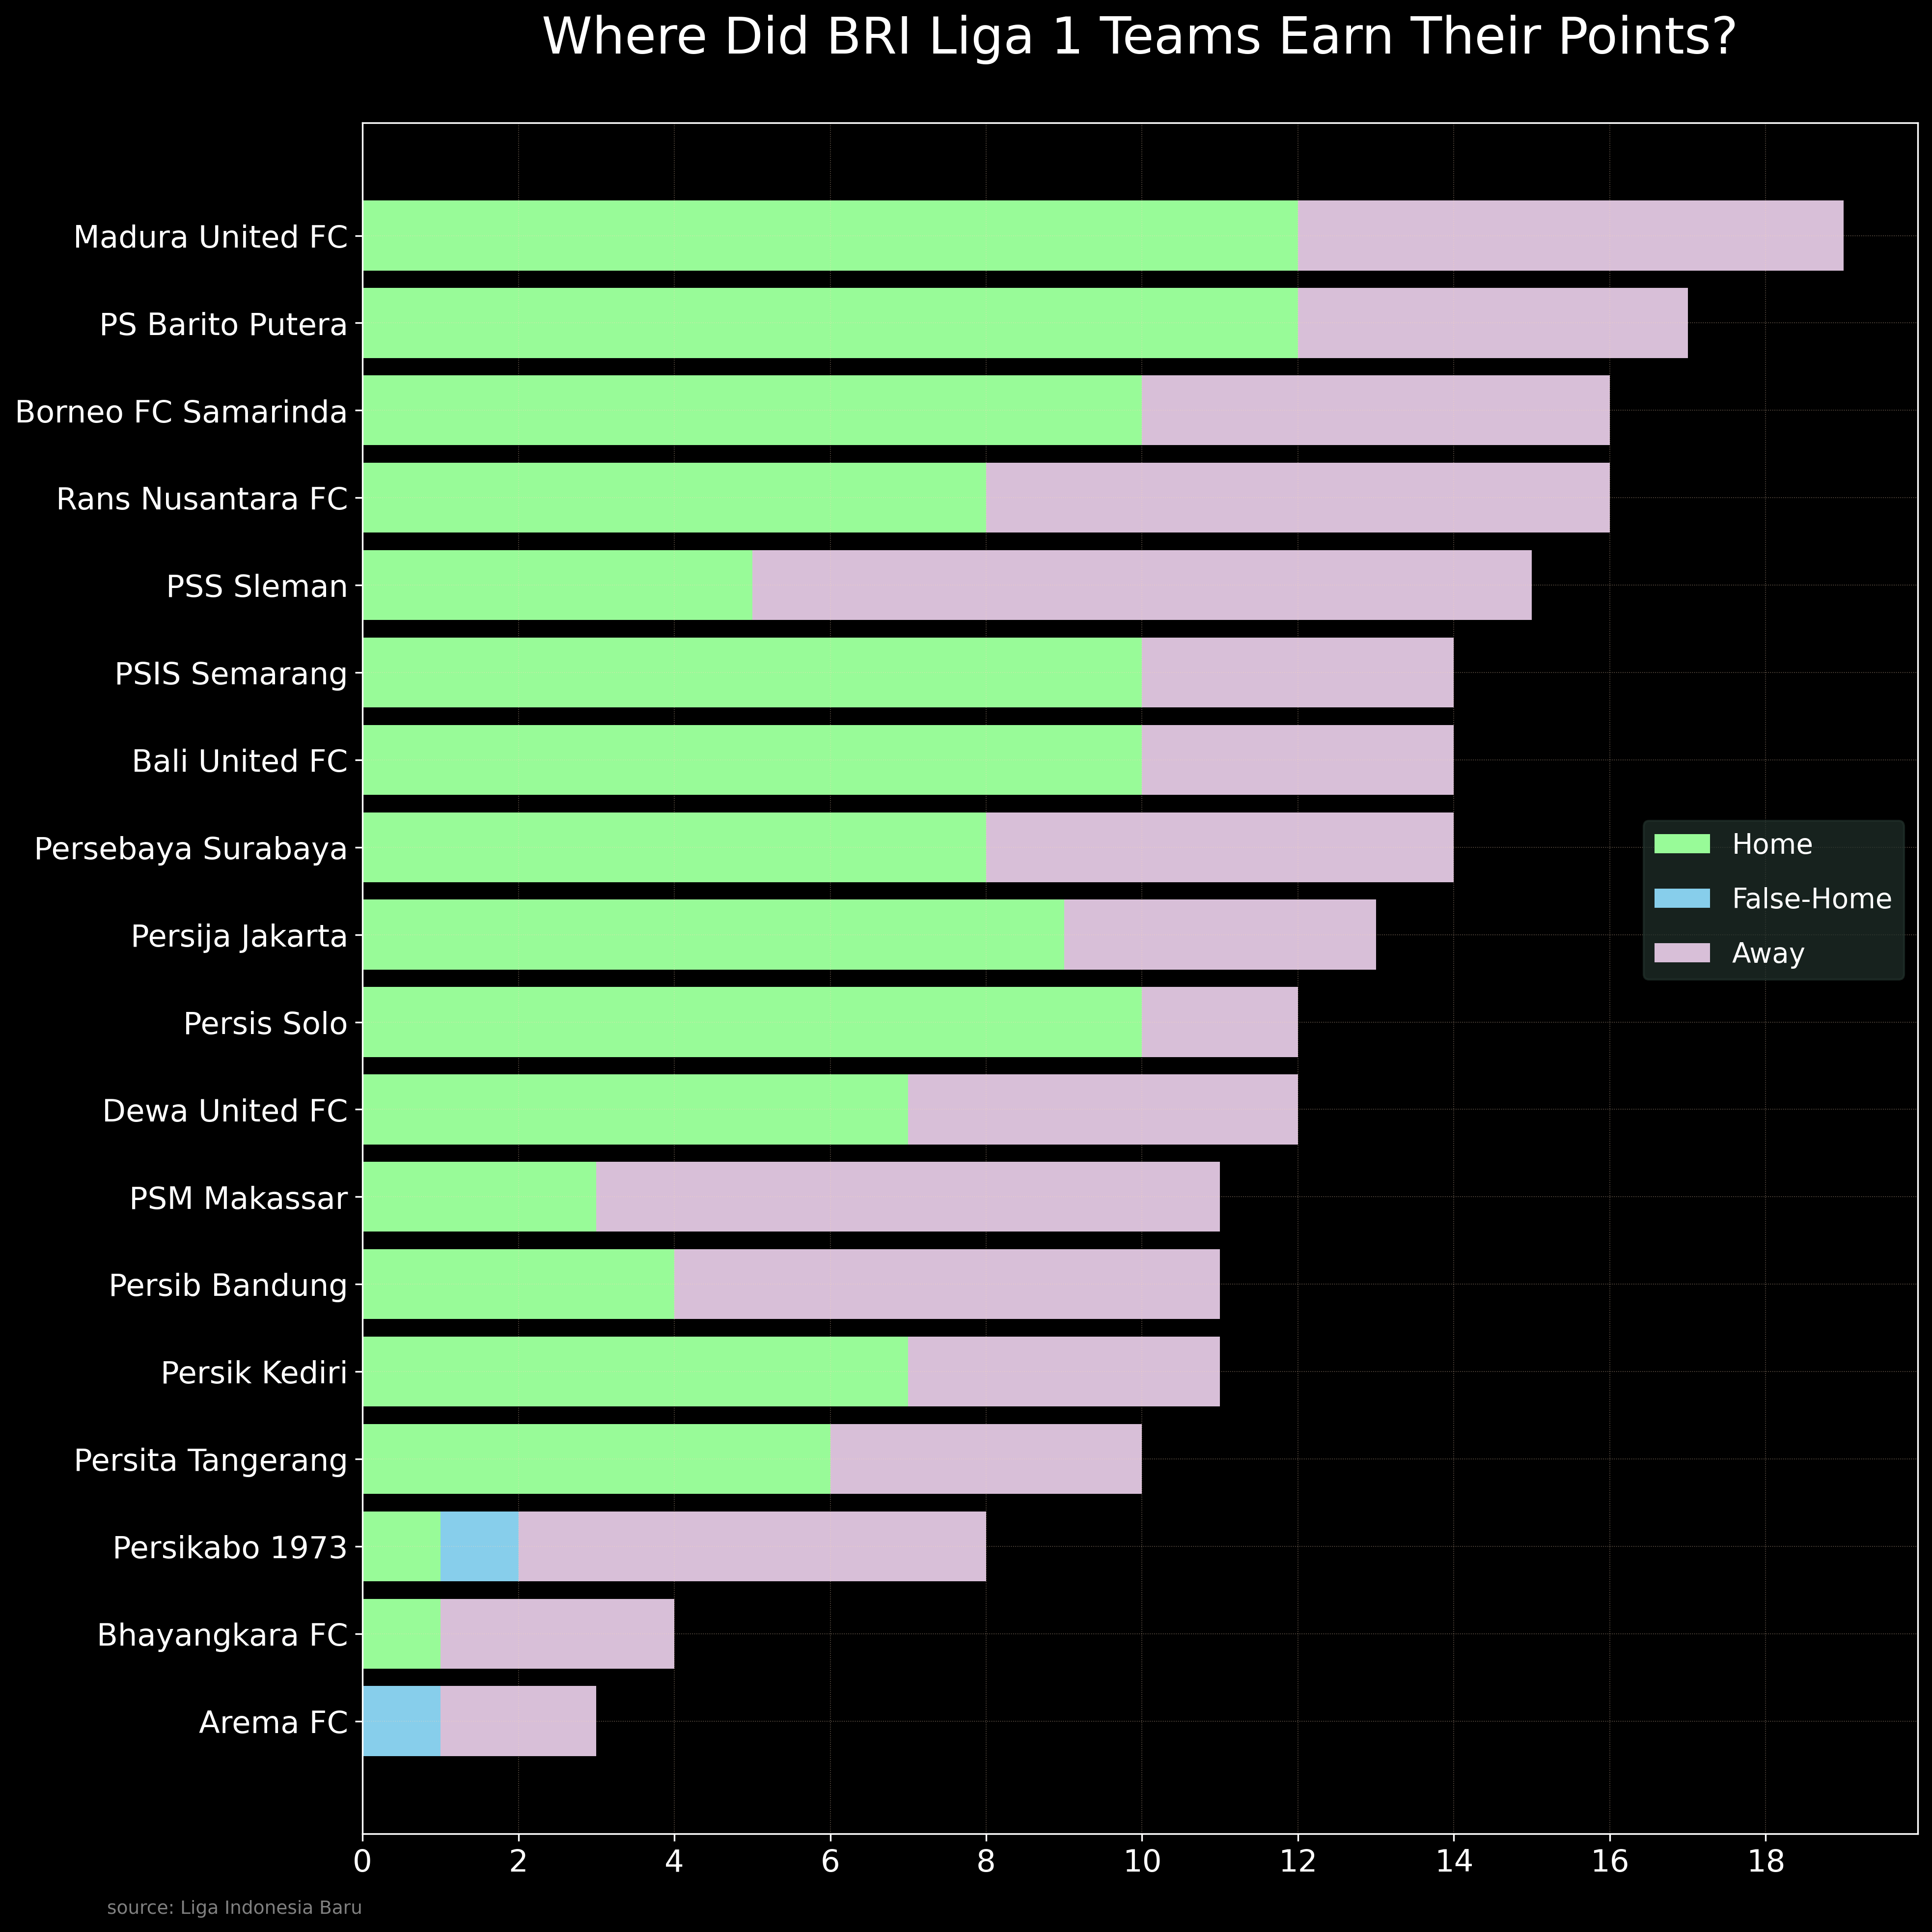

In [115]:
f1=p.figure(num=1, figsize=(13,13), dpi=300, facecolor='k', constrained_layout=True)#22312b
p.axes(facecolor='k')
p.grid(linewidth=.4, linestyle=':', alpha=.4, color='peachpuff')
p.barh(merg.Clubs, merg['Home Points'], color='palegreen', label='Home')
p.barh(merg.Clubs, merg['False Home Points'], left=merg['Home Points'], color='skyblue', label='False-Home')
p.barh(merg.Clubs, merg['Away Points'], left=merg['Home Points']+merg['False Home Points'], color='thistle', label='Away')
p.tick_params(colors='white')
p.legend(bbox_to_anchor=(0.5, 0.1, 0.5, 0.5), #loc='lower right', 
         facecolor='#22312b', edgecolor='#22312b', #(.8,.6)
         fontsize=13.5, labelcolor='white', labelspacing=1,
         fancybox=True, framealpha=.7)
p.yticks(size=15)
p.xticks(n.arange(0,max(merg['Points']),2),
         size=15)
#p.xlim(0,max(merg['Points'])+1)
for spine in ['top', 'bottom', 'left', 'right']:
    p.gca().spines[spine].set_color('white')
p.gca().invert_yaxis()
p.title("Where Did BRI Liga 1 Teams Earn Their Points?\n", size=25, color='white')#Dari Mana Klub BRI Liga 1 Memperoleh Poin?
p.text(s="source: Liga Indonesia Baru", x=0, y=19.2, ha='right', fontsize=9, color='grey')
#p.gca().get_yticklabels()

In [58]:
merg.index

Int64Index([0, 1, 3, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')

### lost

Text(0, 19.2, 'source: Liga Indonesia Baru')

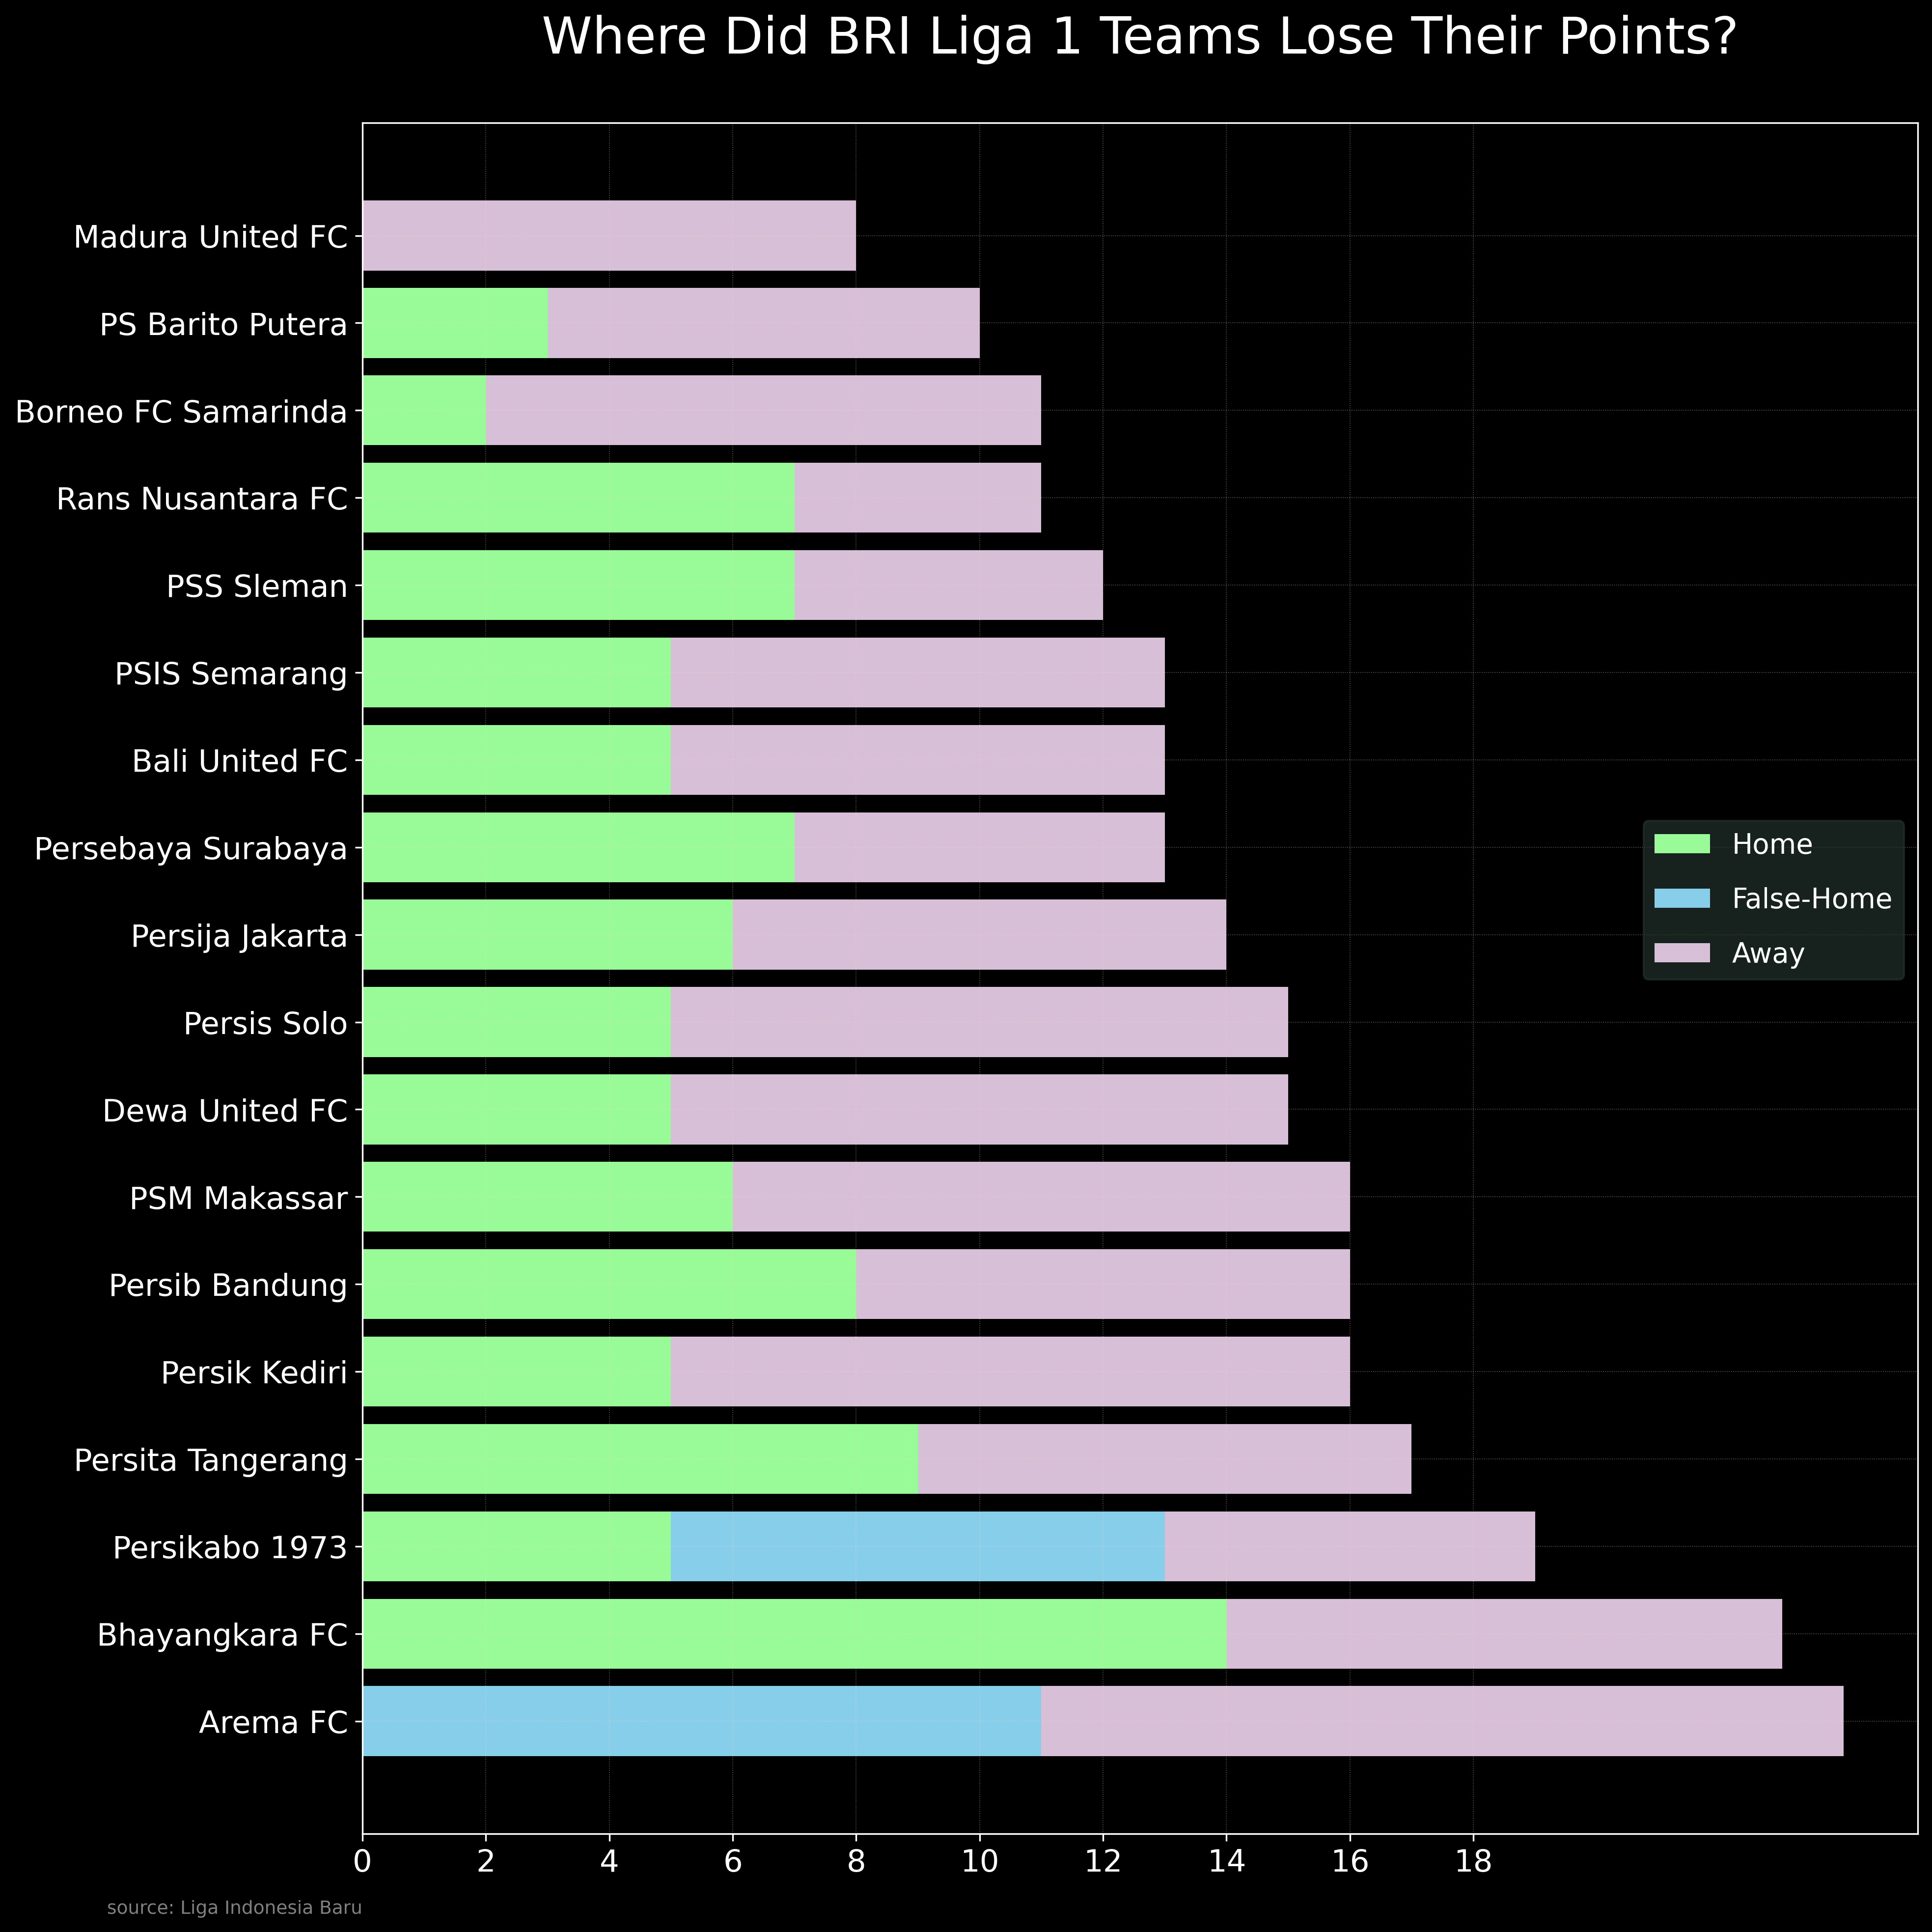

In [116]:
f2=p.figure(num=2, figsize=(13,13), dpi=300, facecolor='k', constrained_layout=True)#22312b
p.axes(facecolor='k')
p.grid(linewidth=.4, ls=':', alpha=.4, color='peachpuff')
p.barh(merg.Clubs, merg['Home Lost'], color='palegreen', label='Home')
p.barh(merg.Clubs, merg['False Home Lost'], left=merg['Home Lost'], color='skyblue', label='False-Home')
p.barh(merg.Clubs, merg['Away Lost'], left=merg['Home Lost']+merg['False Home Lost'], color='thistle', label='Away')
p.tick_params(colors='white')
p.legend(bbox_to_anchor=(0.5, 0.1, 0.5, 0.5), #loc=(1,.5), #(.8,.6)
         facecolor='#22312b', edgecolor='#22312b',
         fontsize=13.5, labelcolor='white', labelspacing=1,
         fancybox=True, framealpha=.7)
p.yticks(size=15)
p.xticks(n.arange(0,max(merg['Points']),2), size=15)
for spine in ['top', 'bottom', 'left', 'right']:
    p.gca().spines[spine].set_color('white')
p.gca().invert_yaxis()
p.title("Where Did BRI Liga 1 Teams Lose Their Points?\n", size=25, color='white')#Di Mana Klub BRI Liga 1 Kehilangan Poin?
p.text(s="source: Liga Indonesia Baru", x=0, y=19.2, ha='right', fontsize=9, color='grey')
#p.gca().get_yticklabels()

In [25]:
###y